# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [153]:
import pandas as pd
df = pd.read_csv("data/DBData.csv")

# Drop columns not present in Matt's example above
df = df.drop(["Indicator Code", "Country Code", "Unnamed: 20"], axis = 1)

# Pivot table for tidy data format
df = (df.pivot_table(index = "Indicator Name",columns = "Country Name")).T.reset_index()

# Rename columns appropriately
df = df.rename(columns = {"level_0": "Year", "Country Name": "Country"})

# Rename index as Measure
df.columns.rename('Measure', inplace=True)
df.head()

Measure,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [58]:
df_2 = pd.read_csv('data/GDPpc.csv')
df_2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3209.694109,3283.510304,3736.363217,3600.673475,3876.958302,4054.721339,3574.543333,3697.121677,3957.441819,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1093.812918,1309.231960,1349.420250,1421.171575,1580.181601,1647.033657,1693.907815,1320.924127,1106.803906,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,433.941194,444.896268,461.798232,498.601747,534.374176,568.348265,...,5805.998362,7276.376756,7967.678159,7478.136578,6819.062302,6429.023950,5742.987800,5279.730472,6151.077955,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,234.166194,221.728401,213.894229,214.852954,243.105321,303.882532,...,1139.110233,1463.213573,1644.619672,1734.930612,1850.793359,1738.088202,1313.889646,1262.989682,1513.276316,NaN


In [121]:
df_gdp = pd.read_csv('data/GDPpc.csv')

# Drop unnecessary columns
df_gdp = df_gdp.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis=1)
# print(df_gdp)

# Want identifier variables as 'Country Name', and values of GDP per year per country 
df_gdp = df_gdp.melt(id_vars=['Country Name'], 
               var_name='Year', 
               value_name='GDP per capita')

# Rename so easy to merge
df_gdp = df_gdp.rename(columns = {"Country Name": "Country"})

df_gdp.head(5)

,Country,Year,GDP per capita
0,Aruba,1960,NaN
1,Afghanistan,1960,59.777327
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN


In [152]:
# merging merging
df_merged = df.merge(df_gdp, on=['Country','Year'])

# Correlations with just the GDP per capita
df_final = pd.DataFrame(mrg.corrwith(df_merged['GDP per capita']))


df_final = df_final.rename(columns= {0: "Corr"})
df_final.sort_values(by="Corr", ascending=False).head(10)

# What are the 3 Ease of Doing Business variables most closely linked to GDP?
# ANSWER: Getting Electricity, corr: 0.646972
#         Resolving insolvency, corr: 0.644209 - 0.644669
#         and Global: Ease of doing business score, corr: 0.605895 - 0.621080

# Give a possible explanation:
# For "Getting electricity", it looks like the higher the GDP of the country, the more/longer power outages 
# that country experiences. Possibly because high GDP countries have lots of electricity and thus can 
# experience power outages more often.
# For "Resolving insolvency", countries with higher GDP resolve more insolvency than lower GDP countries. Possibly because
# they have the means to. 
# For "Global: Ease of doing business score", the higher the ease of doing business, likely the higher the GDP of that country.
# Perhaps the fact that it is easier to do business in those countries is what leads, in part, to that country having 
# a higher GDP.  

,Corr
GDP per capita,1.000000
Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology),0.646972
Resolving insolvency (DB04-14 methodology) - Score,0.644669
Resolving insolvency: Recovery rate (cents on the dollar),0.644232
Resolving insolvency: Recovery rate (cents on the dollar) - Score,0.644209
Global: Ease of doing business score (DB15 methodology),0.621080
Global: Ease of doing business score (DB10-14 methodology),0.615020
Global: Ease of doing business score (DB16 methodology),0.614590
Global: Ease of doing business score (DB17-19 methodology),0.605895
Registering property: Quality of land administration index (0-30) (DB17-19 methodology),0.580885


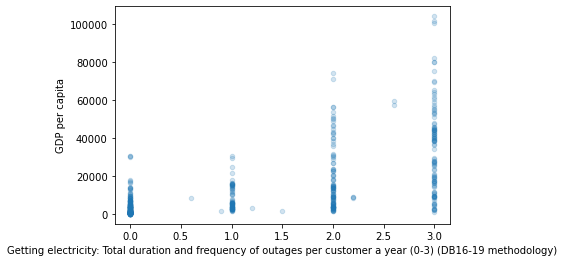

In [151]:
# Data visualizations:

import matplotlib.pyplot as plt

df_merged.plot(y='GDP per capita', x='Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)', kind='scatter', alpha = 0.2)
plt.show()

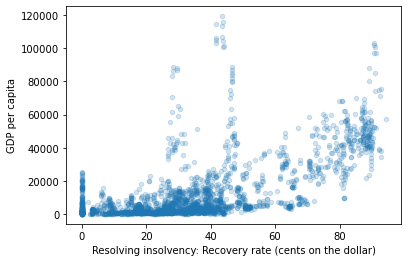

In [150]:
import matplotlib.pyplot as plt

df_merged.plot(y='GDP per capita', x='Resolving insolvency: Recovery rate (cents on the dollar)', kind='scatter', alpha = 0.2)
plt.show()

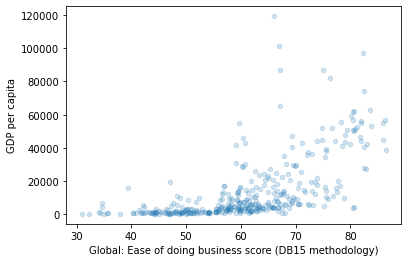

In [149]:
import matplotlib.pyplot as plt

df_merged.plot(y='GDP per capita', x='Global: Ease of doing business score (DB15 methodology)', kind='scatter', alpha = .2)
plt.show()

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

In [130]:
# Where I see possible flaws:

# In the literature review: 
# Using the total number of Nobel laureates per capita: This sounds like a very 
# arbitraty cognitive measure. The author does not cite that other researchers 
# have used this measure of Nobel Laureates before. Nor does the author make any real link between 
# the variables. Obviously using Nobel Laureates as a measure of cognitive function of the population is 
# flawed because there are likely many other factors influencing whether a country 
# has many Nobel Laureates such as whether the schools in that country are any good, 
# and even the ability/ease of having a lab or being able to conduct research (for 
# the science-based Nobel Prizes). The author does not even taken into consideration if the Nobel 
# Laureates were working/living in their country of origin, meaning that they could have been performing 
# their research in another country and thus consumming THAT country's amount of chocolate instead. 
# Thus the paper cannot discern the chocolate consumption by Nobel Laureates. 

# In the measures used:
# Data was reportedly downloaded from Wikipedia. I am sure there must be more reliable
# sources of data than this. All 3 chocolate data links no longer lead to the data. 
# Futhermore, the first Nobel Prize winner goes all the way back to 1901. Whereas this chocolate 
# data only goes back to 2002. Thus there are many years of Nobel Prize winners for which we 
# have no idea what their country's chocolate consumption per capita was. 

# In the conclusion:
# The author fails to give plausible explanations for his conclusions. 
# The country with the highest observed chocolate consumption and number of Nobel Laureates was Switzerland... but
# Switzerland is a very rich country and perhaps the reason this rich country has 
# the highest amount of Nobel Laureates and chocolate consumption is because this rich country provides more
# for their population in terms of education and this increase in educational quality leads to higher paying 
# jobs, and thus leads to the potential ability for the Swiss to spend more money on luxury goods such as chocolate. 
# It should also be a concern to the author that his data shows that although Germany is the 2nd highest consummer
# of chocolate per capita in the world, they only have about half the amount of Nobel Laureates per 10 million 
# compared to Switzerland.
# What's the explanation there? 
